In [1]:
import ast
import sys

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import PIL.Image
import torch
import torch.nn.functional as F

sys.path.insert(0, '..')

In [2]:
from pytorch_image_classification import (
    get_default_config,
    create_model,
    create_transform,
)

In [3]:
config = get_default_config()
config.merge_from_file('../configs/imagenet/resnet18.yaml')

In [4]:
device = torch.device(config.device)

model = create_model(config)
checkpoint = torch.load(
    '../experiments/imagenet/resnet18/exp00/checkpoint_00090.pth')

model.load_state_dict(checkpoint['model'])
model.to(device)
_ = model.eval()

In [5]:
transform = create_transform(config, is_train=False)

In [6]:
%%capture
!wget https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt

In [7]:
with open('imagenet1000_clsidx_to_labels.txt') as f:
    index2label = ast.literal_eval(f.read())

In [8]:
%%capture
!wget https://images.pexels.com/photos/2071873/pexels-photo-2071873.jpeg

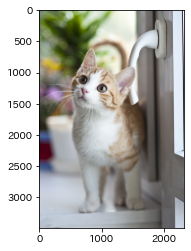

In [9]:
image = cv2.imread('pexels-photo-2071873.jpeg')
plt.imshow(image[:, :, ::-1])
plt.show()

In [10]:
data = transform(PIL.Image.fromarray(image))
with torch.no_grad():
    pred = model(data.unsqueeze(0).to(device))
prob = F.softmax(pred, dim=1).cpu()

scores, indices = prob.topk(k=5)
scores = scores.numpy().ravel()

indices = indices.numpy().ravel()
names = [index2label[index] for index in indices]
pd.DataFrame({'label': names, 'score': scores})

,label,score
0,Egyptian cat,0.836771
1,"lynx, catamount",0.022285
2,"tabby, tabby cat",0.020165
3,"Siamese cat, Siamese",0.017015
4,tiger cat,0.007150
